In [60]:
import geopandas as gpd
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
universal_path="C:/Users/umber\Desktop\Assignment Data 2023-2024" #inserisci qui il path in cui sono presenti i dile .csv

In [95]:
player_valuations_df=pd.read_csv(universal_path+'/player_valuations.csv')
game_events_df=pd.read_csv(universal_path+'/game_events.csv')
games_df=pd.read_csv(universal_path+'/games.csv')
players_df=pd.read_csv(universal_path+'/players.csv')
game_lineups_df=pd.read_csv(universal_path+'/game_lineups.csv')
competition_df=pd.read_csv(universal_path+'/competitions.csv')

### seleziono solo le colonne necessarie e sostituisco le stringhe dei valori di mercato in varibili di tipo float

In [96]:
filtered_player=players_df[['player_id', 'name', 'last_season',
                  'market_value_in_eur', 'highest_market_value_in_eur',
                  'total_goals_in_career', 'total_goals_last_season', 'position','sub_position', 'date_of_birth','current_club_domestic_competition_id','country_of_citizenship']]
filtered_player = filtered_player.dropna(subset=['market_value_in_eur'])

filtered_player['market_value_in_eur'] = filtered_player['market_value_in_eur'].str.replace('€', '')  
filtered_player['market_value_in_eur'] = filtered_player['market_value_in_eur'].str.replace('.', '')  
filtered_player['market_value_in_eur'] = filtered_player['market_value_in_eur'].str.replace(',', '.')  
filtered_player['market_value_in_eur'] = filtered_player['market_value_in_eur'].astype(float)

filtered_player['highest_market_value_in_eur'] = filtered_player['highest_market_value_in_eur'].str.replace('€', '')  
filtered_player['highest_market_value_in_eur'] = filtered_player['highest_market_value_in_eur'].str.replace('.', '')  
filtered_player['highest_market_value_in_eur'] = filtered_player['highest_market_value_in_eur'].str.replace(',', '.')  
filtered_player['highest_market_value_in_eur'] = filtered_player['highest_market_value_in_eur'].astype(float)
filtered_player

,player_id,name,last_season,market_value_in_eur,highest_market_value_in_eur,total_goals_in_career,total_goals_last_season,position,sub_position,date_of_birth,current_club_domestic_competition_id,country_of_citizenship
7,4042,Brad Jones,2017,100000.0,2000000.0,1,0,Goalkeeper,Goalkeeper,1982-03-19,NL1,Australia
33,8187,Juanmi Callejón,2012,200000.0,1000000.0,0,0,Attack,Left Winger,1987-02-11,GR1,Spain
72,18922,Karim Benzema,2022,25000000.0,60000000.0,279,44,Attack,Centre-Forward,1987-12-19,ES1,France
89,22860,Jesper Hansen,2023,200000.0,1000000.0,2,1,Goalkeeper,Goalkeeper,1985-03-31,DK1,Denmark
93,23365,Reginaldo,2012,10000.0,3500000.0,6,0,Attack,Centre-Forward,1983-07-31,IT1,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...
30297,371851,Jaka Bijol,2023,10000000.0,10000000.0,11,2,Defender,Centre-Back,1999-02-05,IT1,Slovenia
30298,537171,Semuel Pizzignacco,2018,325000.0,350000.0,0,0,Goalkeeper,Goalkeeper,2001-09-01,IT1,Italy
30299,586756,Festy Ebosele,2023,4500000.0,4500000.0,0,0,Midfield,Right Midfield,2002-08-02,IT1,Ireland
30300,704692,Nicolò Cocetta,2022,75000.0,75000.0,0,0,Defender,Centre-Back,2003-12-19,IT1,Italy


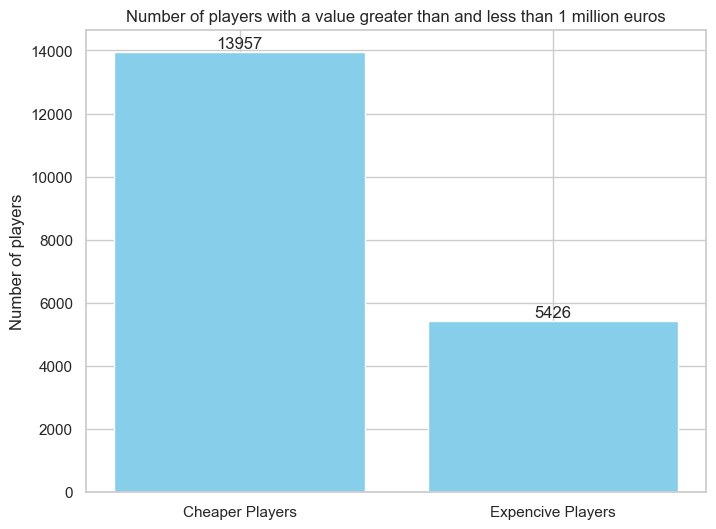

In [97]:
cheaper_players = filtered_player[filtered_player['market_value_in_eur']<1000000]
number_cheaper_players = len(cheaper_players)
expencive_players = filtered_player[filtered_player['market_value_in_eur']>=1000000]
number_expencive_players = len(expencive_players)
categories = ['Cheaper Players', 'Expencive Players']
data = [number_cheaper_players, number_expencive_players]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, data, color='skyblue')
plt.title('Number of players with a value greater than and less than 1 million euros')
plt.ylabel('Number of players')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.show()  

# confronto i giocatori economici e costosi in relazione al numero di goal segnati
## Cheaper Players:
### La maggior parte dei giocatori economici segna pochi o nessun goal. Solo un numero molto piccolo di giocatori economici riesce a segnarne più di 10, e il massimo numero di goal segnato da un giocatore economico è circa 23
## Expensive Players:
### I goal segnati dai giocatori costosi è molto più varia. C'è una presenza significativa di giocatori che segnano un numero elevato di goal, il che è coerente con l'aspettativa che i giocatori più costosi siano generalmente più performanti. Inoltre i giocatori costosi che hanno segnato piu di 10 goal sono molti


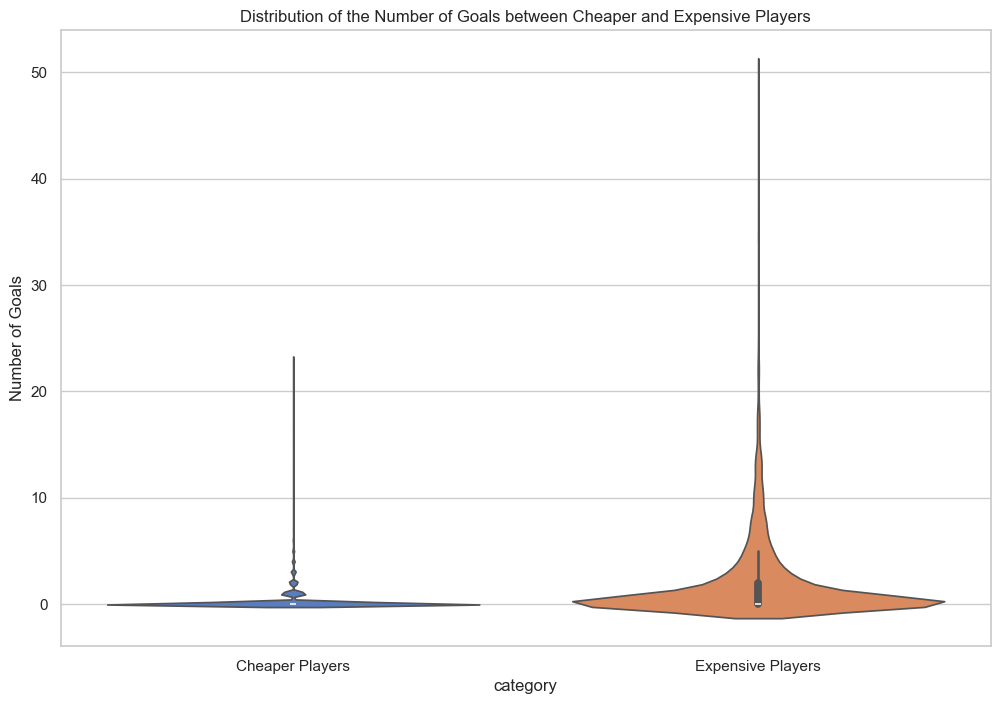

In [98]:
cheaper_players = filtered_player[filtered_player['market_value_in_eur'] < 1000000].copy()
expensive_players = filtered_player[filtered_player['market_value_in_eur'] >= 1000000].copy()

cheaper_players.loc[:, 'category'] = 'Cheaper Players'
expensive_players.loc[:, 'category'] = 'Expensive Players'

combined_df = pd.concat([cheaper_players, expensive_players])

plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='total_goals_last_season', hue='category', data=combined_df, palette='muted', legend=False)

plt.title('Distribution of the Number of Goals between Cheaper and Expensive Players')
plt.xlabel('category')
plt.ylabel('Number of Goals')

plt.show()

Numero totale di goal fatti dai portieri: 296
Numero totale di goal fatti dai difensori: 17919
Numero totale di goal fatti dai centrocampisti: 34037
Numero totale di goal fatti dagli attaccanti: 75380
Numero totale di portieri: 2091
Numero totale di difensori: 6147
Numero totale di centrocampisti: 5606
Numero totale di attaccanti: 5524


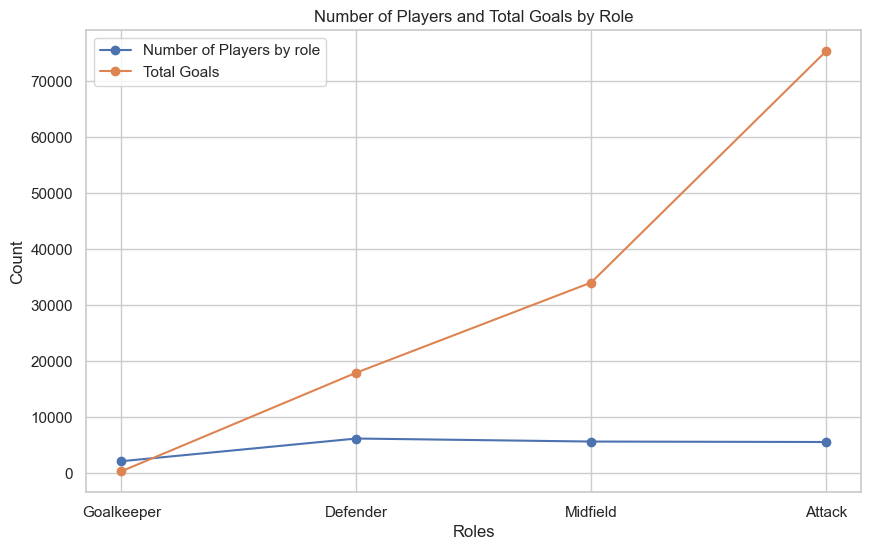

In [99]:
# Calcola il numero totale di giocatori e goal fatti per ogni ruolo

goalkeeper_df = filtered_player[filtered_player['position'] == 'Goalkeeper']
number_goalkeepers = len(goalkeeper_df)
total_goals_goalkeeper = goalkeeper_df['total_goals_in_career'].sum()

defenders_df = filtered_player[filtered_player['position'] == 'Defender']
number_defenders = len(defenders_df)
total_goals_defenders = defenders_df['total_goals_in_career'].sum()

midfielders_df = filtered_player[filtered_player['position'] == 'Midfield']
number_midfielders = len(midfielders_df)
total_goals_midfielders = midfielders_df['total_goals_in_career'].sum()

attackers_df = filtered_player[filtered_player['position'] == 'Attack']
number_attackers = len(attackers_df)
total_goals_attackers = attackers_df['total_goals_in_career'].sum()

print(f"Numero totale di goal fatti dai portieri: {total_goals_goalkeeper}")
print(f"Numero totale di goal fatti dai difensori: {total_goals_defenders}")
print(f"Numero totale di goal fatti dai centrocampisti: {total_goals_midfielders}")
print(f"Numero totale di goal fatti dagli attaccanti: {total_goals_attackers}")
print(f"Numero totale di portieri: {number_goalkeepers}")
print(f"Numero totale di difensori: {number_defenders}")
print(f"Numero totale di centrocampisti: {number_midfielders}")
print(f"Numero totale di attaccanti: {number_attackers}")
roles = ['Goalkeeper', 'Defender', 'Midfield', 'Attack']
number_of_players = [number_goalkeepers, number_defenders, number_midfielders, number_attackers]
total_goals = [total_goals_goalkeeper, total_goals_defenders, total_goals_midfielders, total_goals_attackers]

plt.figure(figsize=(10, 6))

plt.plot(roles, number_of_players, marker='o', label='Number of Players by role')
plt.plot(roles, total_goals, marker='o', label='Total Goals')

plt.xlabel('Roles')
plt.ylabel('Count')
plt.title('Number of Players and Total Goals by Role')
plt.legend()

plt.grid(True)
plt.show()

# analizzo il numero di giocatori per ruolo che ci sono in una squadra 
### creo un metodo per convertire sub_position in position

In [100]:
game_lineups_filtered=game_lineups_df[['club_id','game_id','player_id','position']]
game_events_filtered = game_events_df[['game_id', 'date']]
game_events_filtered.loc[:, 'date'] = pd.to_datetime(game_events_filtered['date'])
start_date = pd.to_datetime('2022-08-01')
end_date = pd.to_datetime('2023-07-31')
game_events_filtered = game_events_filtered[(game_events_filtered['date'] >= start_date) & (game_events_filtered['date'] <= end_date)]

role_mapping = {
    'Goalkeeper': 'Goalkeeper',
    'Centre-Back': 'Defender',
    'Left-Back': 'Defender',
    'Right-Back': 'Defender',
    'Central Midfield': 'Midfield',
    'Defensive Midfield': 'Midfield',
    'Attacking Midfield': 'Midfield',
    'Left Winger': 'Attack',
    'Right Winger': 'Attack',
    'Centre-Forward': 'Attack',
}


game_lineups_filtered.loc[:, 'position'] = game_lineups_filtered['position'].map(role_mapping)
#game_lineups_filtered è un data frame che mi serve per analizzare il numero di giocatori di un ruolo che ci sono in una squadra
game_lineups_filtered

,club_id,game_id,player_id,position
0,338,3606208,419061,Attack
1,338,3606208,368611,Midfield
2,338,3606208,124182,Midfield
3,338,3606208,181118,Defender
4,338,3606208,404842,Defender
...,...,...,...,...
119128,46889,4228114,1200869,Defender
119129,46889,4228114,1203716,NaN
119130,46889,4228114,1200870,Goalkeeper
119131,46889,4228114,550816,Midfield


In [101]:
merged_df = game_lineups_filtered.merge(game_events_filtered, on='game_id')
merged_df = merged_df.drop_duplicates(subset=['club_id', 'game_id', 'player_id', 'position'])
#merged_df contiene anche la data per utilizzare solo i dati di una stagione in modo da escludere giocatori che hanno giocato in una squadra anni passati >> serve per ottenere la rosa completa di una squadra di un dreterminato anno
merged_df

,club_id,game_id,player_id,position,date
0,418,3998376,401530,Defender,2023-01-11 00:00:00
27,418,3998376,86202,Defender,2023-01-11 00:00:00
54,418,3998376,58884,Defender,2023-01-11 00:00:00
81,418,3998376,221316,Defender,2023-01-11 00:00:00
108,418,3998376,31909,Midfield,2023-01-11 00:00:00
...,...,...,...,...,...
166332,8024,4140355,392655,Attack,2023-07-30 00:00:00
166349,8024,4140355,282721,Midfield,2023-07-30 00:00:00
166366,8024,4140355,534528,Attack,2023-07-30 00:00:00
166383,8024,4140355,527304,Midfield,2023-07-30 00:00:00


In [102]:

position_counts = merged_df.groupby(['club_id', 'position']).size().unstack(fill_value=0)

position_counts = position_counts.reindex(columns=['Goalkeeper', 'Defender', 'Midfield', 'Attack'], fill_value=0)

print("Conteggi delle posizioni per club:\n", position_counts)

# Calcola la media dei ruoli per tutte le squadre
average_positions = position_counts.mean(axis=0)

print("Medie delle posizioni per tutte le squadre:\n", average_positions)

Conteggi delle posizioni per club:
 position  Goalkeeper  Defender  Midfield  Attack
club_id                                         
14                 3         5         5       6
26                 3         7         7       6
36                 3         8         4       8
58                 2         6         5       4
61                 2         7         3       9
...              ...       ...       ...     ...
87879              2         6         4       3
102196             2         4         5       2
102355             2         6         6       3
110302             4        10        11      13
110586             2         4         5       2

[254 rows x 4 columns]
Medie delle posizioni per tutte le squadre:
 position
Goalkeeper     4.720472
Defender      11.972441
Midfield      10.149606
Attack        10.196850
dtype: float64


# analisi sui giocatori costosi
### il primo dato che stupisce, tra i giocatori che valgono piu di 30 Milioni di euro, il numero di attaccanti e di centrocampisti è uguale

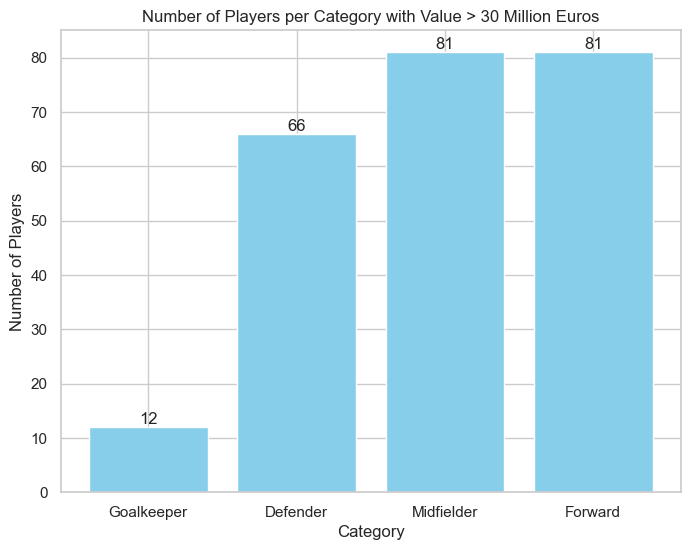

In [104]:
high_value_players = filtered_player[filtered_player['market_value_in_eur'] > 30000000]

# Conta il numero di giocatori in ciascuna categoria
number_goalkeepers = len(high_value_players[high_value_players['position'] == 'Goalkeeper'])
number_defenders = len(high_value_players[high_value_players['position'] == 'Defender'])
number_midfielders = len(high_value_players[high_value_players['position'] == 'Midfield'])
number_attackers = len(high_value_players[high_value_players['position'] == 'Attack'])

categories = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
total_player = [number_goalkeepers, number_defenders, number_midfielders, number_attackers]

plt.figure(figsize=(8, 6))
bars = plt.bar(categories, total_player, color='skyblue')
plt.title('Number of Players per Category with Value > 30 Million Euros')
plt.xlabel('Category')
plt.ylabel('Number of Players')

# Aggiungi i valori sopra le barre
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{int(height)}', ha='center', va='bottom')

plt.show()

### nonostante la maggior parte del numero dei gol è segnato dagli attacanti, questo è la prova che il numero dei goal non è l'unica variabile che determina il valore dei giocatori.
### 

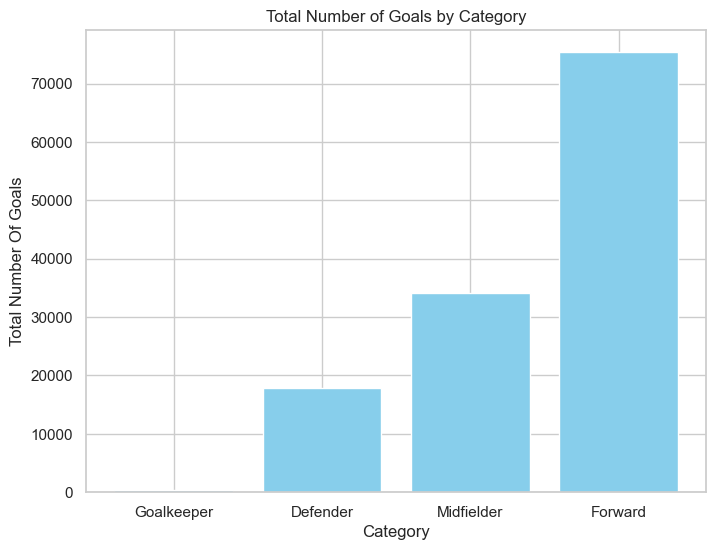

In [105]:
categories = ['Goalkeeper', 'Defender', 'Midfielder', 'Forward']
total_goals = [total_goals_goalkeeper, total_goals_defenders, total_goals_midfielders, total_goals_attackers]

# Creazione del barplot con matplotlib
plt.figure(figsize=(8, 6))
plt.bar(categories, total_goals, color='skyblue')
plt.title('Total Number of Goals by Category')
plt.xlabel('Category')
plt.ylabel('Total Number Of Goals')
plt.show()

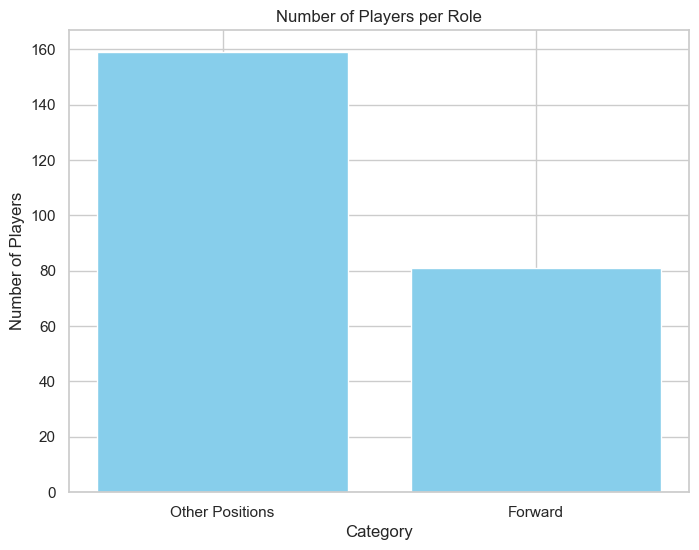

In [106]:
categories = ['Other Positions', 'Forward']
total_player = [number_goalkeepers+number_defenders+number_midfielders, number_attackers]

# Creazione del barplot con matplotlib
plt.figure(figsize=(8, 6))
plt.bar(categories, total_player, color='skyblue')
plt.title('Number of Players per Role')
plt.xlabel('Category')
plt.ylabel('Number of Players')
plt.show()

# l'età è una variabile determinante per la valutazione di un giocatore

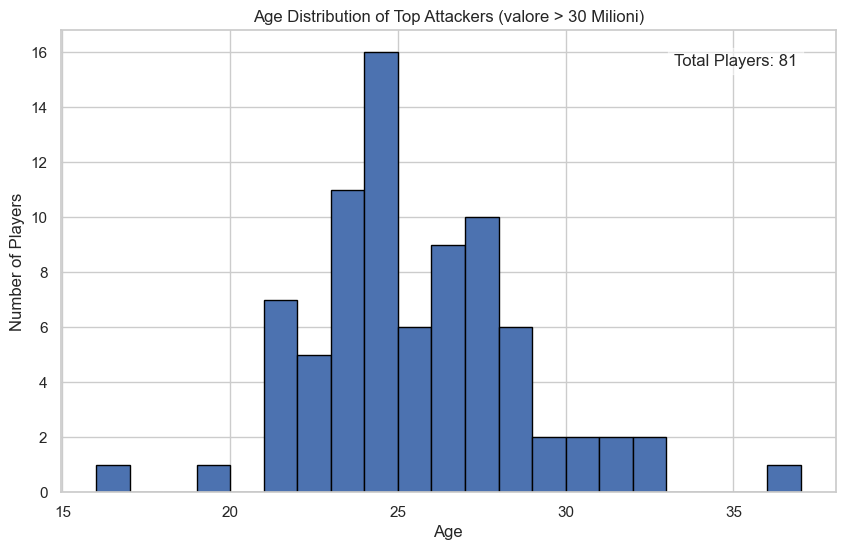

In [107]:
df_subset = filtered_player[(filtered_player['position'] == 'Attack') & 
                            (filtered_player['market_value_in_eur'] > 30000000)].copy()

# Calcola l'età dei giocatori
current_date = pd.to_datetime('today')
df_subset.loc[:, 'date_of_birth'] = pd.to_datetime(df_subset['date_of_birth'])
df_subset.loc[:, 'age'] = df_subset['date_of_birth'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))


plt.figure(figsize=(10, 6))
plt.hist(df_subset['age'], bins=range(df_subset['age'].min(), df_subset['age'].max() + 1), edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.title('Age Distribution of Top Attackers (valore > 30 Milioni)')
plt.grid(True)

plt.text(0.95, 0.95, f'Total Players: {df_subset.__len__()}', horizontalalignment='right', verticalalignment='top', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))


plt.show()

### correlazione tra goal segnati e valore di mercato tra i giocatori che valgono più di 30 milioni di euro 


In [108]:
df_subset = filtered_player[(filtered_player['position'] == 'Attack') & 
                                 (filtered_player['market_value_in_eur'] > 3000000)]


goals = df_subset['total_goals_last_season']
market_value = df_subset['market_value_in_eur']
slope, intercept = np.polyfit(goals, market_value, 1)

# Crea il DataFrame per la linea di tendenza
trendline_df = pd.DataFrame({
    'goals': [goals.min(), goals.max()],
    'trendline': [slope * goals.min() + intercept, slope * goals.max() + intercept]
})

# Crea il grafico a dispersione con Altair
scatter_plot = alt.Chart(df_subset).mark_circle().encode(
    x='total_goals_last_season:Q',
    y='market_value_in_eur:Q',
    tooltip=['name', 'date_of_birth']
).properties(
    title='Correlation between Market Value and Number of Goals (forwards with Value > 3 Million)',
    width=600,
    height=400
)

trendline = alt.Chart(trendline_df).mark_line(color='red').encode(
    x='goals:Q',
    y='trendline:Q'
)
final_chart = (scatter_plot + trendline)
final_chart.interactive()

C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert

alt.LayerChart(...)

### L'età influisce significativamente sul valore di mercato dei top giocatori. Se escludiamo i giocatori over 25, la retta di trend mostra una maggiore inclinazione, indicando che il valore di mercato dei giocatori giovani dipende fortemente dal numero di goal segnati. Invece, per i giocatori a fine carriera, il valore di mercato tende a essere più basso, anche se segnano molti goal. Questo fenomeno evidenzia come il potenziale futuro e la longevità della carriera influenzino il valore di mercato più delle prestazioni attuali per i giocatori giovani.

In [109]:
df_subset = filtered_player[(filtered_player['position'] == 'Attack') & 
                            (filtered_player['market_value_in_eur'] > 3000000) &
                            (filtered_player['date_of_birth'] > '1998-01-01')]

goals = df_subset['total_goals_last_season']
market_value = df_subset['market_value_in_eur']
slope, intercept = np.polyfit(goals, market_value, 1)

trendline_df = pd.DataFrame({
    'goals': [goals.min(), goals.max()],
    'trendline': [slope * goals.min() + intercept, slope * goals.max() + intercept]
})

# Crea il grafico a dispersione con Altair
scatter_plot = alt.Chart(df_subset).mark_circle().encode(
    x='total_goals_last_season:Q',
    y='market_value_in_eur:Q',
    tooltip=['name','date_of_birth']
).properties(
    title='Correlation between Market Value and Number of Goals (Players with Position = Attack and Value > 3 Million and Age < 26 years)',
    width=600,
    height=400
)

trendline = alt.Chart(trendline_df).mark_line(color='red').encode(
    x='goals:Q',
    y='trendline:Q'
)

final_chart = (scatter_plot + trendline)

final_chart.interactive()

C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
C:\Users\umber\miniconda3\envs\FootbrawlAnalytics\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert

alt.LayerChart(...)

### un' altra variabile che va a influire sul valore del giocatore è il numero di cartellini che riceve

In [110]:
yellow_cards_count = game_events_df[game_events_df['type'] == 'Cards']['player_id'].value_counts().reset_index()
yellow_cards_count.columns = ['player_id', 'cards_count']

# Unire il conteggio dei cartellini gialli con il DataFrame delle valutazioni dei giocatori
player_valuations_df = pd.merge(yellow_cards_count, player_valuations_df, on='player_id')

# Rimuovere le colonne duplicate, se esistono
columns_to_drop = ['cards_count_x', 'cards_count_y']

# Verifica se le colonne esistono e rimuovile
for col in columns_to_drop:
    if col in player_valuations_df.columns:
        player_valuations_df = player_valuations_df.drop(columns=[col])

# Rimuovere i duplicati mantenendo solo il primo record per 'player_id'
player_valuations_df = player_valuations_df.drop_duplicates(subset=['player_id'])

# Visualizzare le prime righe del DataFrame per verificare
player_valuations_df.head()

,player_id,cards_count,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id
0,25557,41,2023,2005-03-17 00:00:00,2005-03-17,2005-03-14,7000000,1,368,ES1
42,63290,37,2019,2007-12-11 00:00:00,2007-12-11,2007-12-10,100000,1,714,ES1
75,65467,34,2023,2008-01-11 00:00:00,2008-01-11,2008-01-07,100000,1,683,GR1
114,22969,34,2017,2004-10-04 00:00:00,2004-10-04,2004-10-04,200000,1,13,ES1
146,53077,34,2023,2007-12-11 00:00:00,2007-12-11,2007-12-10,100000,1,30120,GR1


### in questo grafico bisogna considerare che la maggior parte dei cartellini gialli viene preso dai difensori 

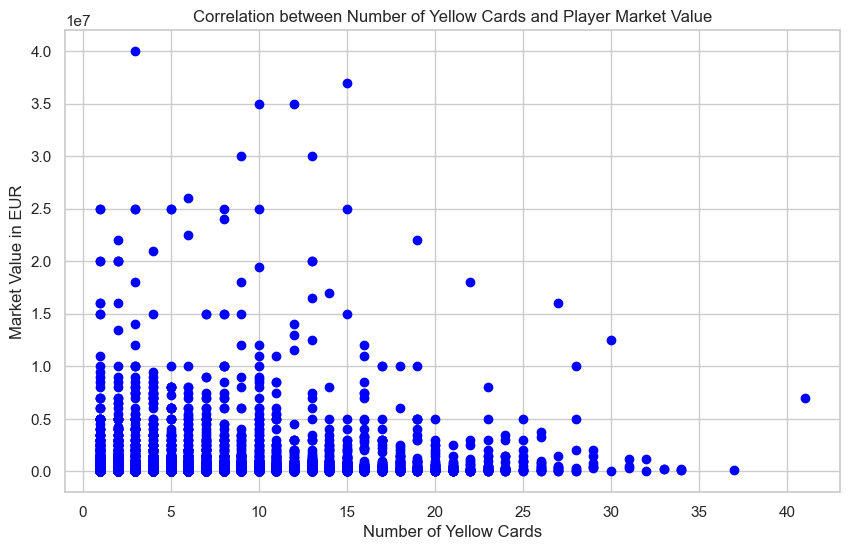

In [111]:
plt.figure(figsize=(10, 6))
plt.scatter(player_valuations_df['cards_count'], player_valuations_df['market_value_in_eur'], color='blue')
plt.title('Correlation between Number of Yellow Cards and Player Market Value')
plt.xlabel('Number of Yellow Cards')
plt.ylabel('Market Value in EUR')
plt.grid(True)
plt.show()

In [112]:
merged_df_1 = pd.merge(yellow_cards_count, player_valuations_df, on='player_id', how='inner')
final_merged_df = pd.merge(merged_df_1, game_lineups_filtered, on='player_id', how='inner')
cartellini_e_valore = final_merged_df.drop_duplicates(subset='player_id')
cartellini_e_valore = cartellini_e_valore.drop(columns=['cards_count_y'])
cartellini_e_valore

,player_id,cards_count_x,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id,club_id,game_id,position
0,25557,41,2023,2005-03-17 00:00:00,2005-03-17,2005-03-14,7000000,1,368,ES1,368,4112970,Defender
12,65467,34,2023,2008-01-11 00:00:00,2008-01-11,2008-01-07,100000,1,683,GR1,683,4146798,Midfield
23,53077,34,2023,2007-12-11 00:00:00,2007-12-11,2007-12-10,100000,1,30120,GR1,30120,4150482,Defender
32,128488,33,2018,2012-03-19 00:00:00,2012-03-19,2012-03-19,200000,1,367,ES1,2867,4204033,Defender
33,113045,32,2023,2010-08-15 00:00:00,2010-08-15,2010-08-09,1200000,1,265,GR1,265,4089915,Midfield
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61495,81988,1,2020,2009-09-01 00:00:00,2009-09-01,2009-08-31,300000,1,1533,ES1,142,4204015,Attack
61496,238865,1,2015,2012-12-02 00:00:00,2012-12-02,2012-11-26,200000,1,1533,ES1,8031,4136839,Midfield
61498,166260,1,2021,2018-01-25 00:00:00,2018-01-25,2018-01-22,200000,1,511,SC1,511,4120849,Midfield
61499,147072,1,2018,2012-08-11 00:00:00,2012-08-11,2012-08-06,50000,1,3714,RU1,67241,4181746,Goalkeeper


### in ogni ruolo i giocatori che calgono di piu hanno preso pochissimi cartellini e in generale questi influiscono notevolmente  sul valore dei gioactori 

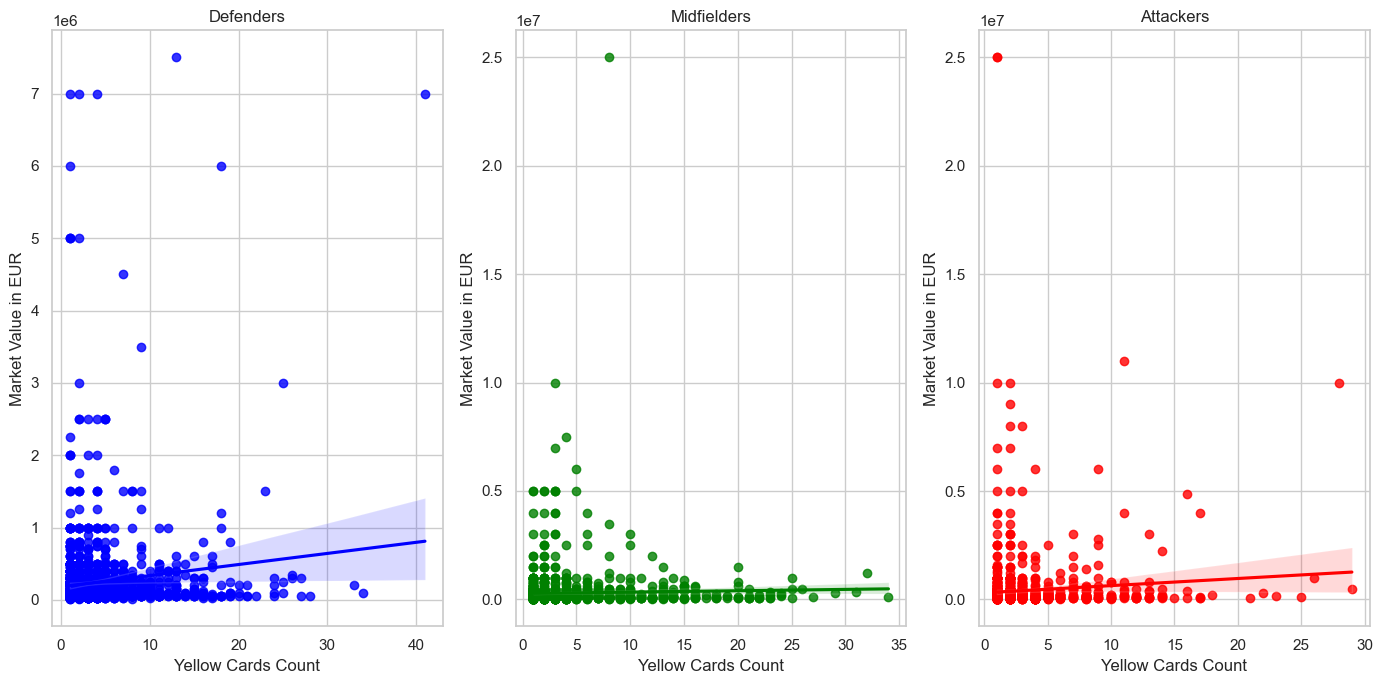

In [113]:
defenders = cartellini_e_valore[cartellini_e_valore['position'] == 'Defender']
midfielders = cartellini_e_valore[cartellini_e_valore['position'] == 'Midfield']
attackers = cartellini_e_valore[cartellini_e_valore['position'] == 'Attack']

# Rimuovere eventuali valori nulli
defenders = defenders.dropna(subset=['cards_count_x', 'market_value_in_eur'])
midfielders = midfielders.dropna(subset=['cards_count_x', 'market_value_in_eur'])
attackers = attackers.dropna(subset=['cards_count_x', 'market_value_in_eur'])

sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))

plt.subplot(1, 3, 1)
sns.regplot(x='cards_count_x', y='market_value_in_eur', data=defenders, color='blue', marker='o')
plt.title('Defenders')
plt.xlabel('Yellow Cards Count')
plt.ylabel('Market Value in EUR')

plt.subplot(1, 3, 2)
sns.regplot(x='cards_count_x', y='market_value_in_eur', data=midfielders, color='green', marker='o')
plt.title('Midfielders')
plt.xlabel('Yellow Cards Count')
plt.ylabel('Market Value in EUR')

plt.subplot(1, 3, 3)
sns.regplot(x='cards_count_x', y='market_value_in_eur', data=attackers, color='red', marker='o')
plt.title('Attackers')
plt.xlabel('Yellow Cards Count')
plt.ylabel('Market Value in EUR')

plt.tight_layout()
plt.show()

### un evento che ha segnato notevolmente il valore dei giocatori è stato il covid 19

Text(0.5, 1.0, 'Average value of players correlated to the year.')

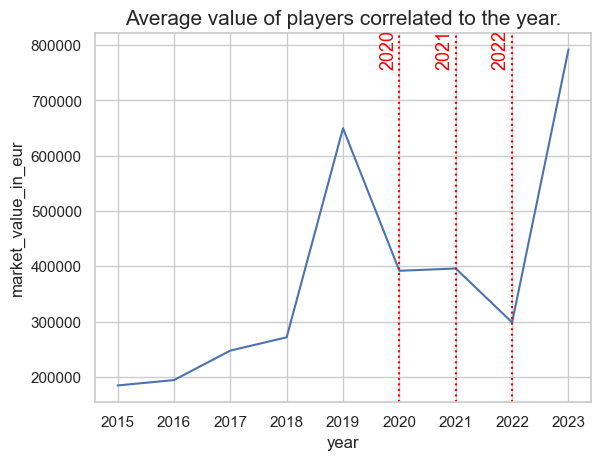

In [114]:
from matplotlib import ticker

player_valuations_df['date']=pd.to_datetime(player_valuations_df['date'])
player_valuations_df['year'] = player_valuations_df['date'].dt.year
filtered_player_valuations=player_valuations_df[player_valuations_df['year']>=2015]
avg_player_valuations=filtered_player_valuations.groupby('year')['market_value_in_eur'].mean().reset_index()
sns.lineplot(data=avg_player_valuations,x='year', y = 'market_value_in_eur')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
covid_years = [2020, 2021, 2022]
for year in covid_years:
    plt.axvline(x=year, color='red', linestyle=':')
    plt.text(year-0.2, avg_player_valuations['market_value_in_eur'].max(), str(year), color='red', ha='center',va='center',rotation=90, fontsize=13)

plt.title('Average value of players correlated to the year.', fontsize=15)

### il mondo del calcio è un modo ricchissimo, che ovviamente dipende dal numero di persone che lo guardano

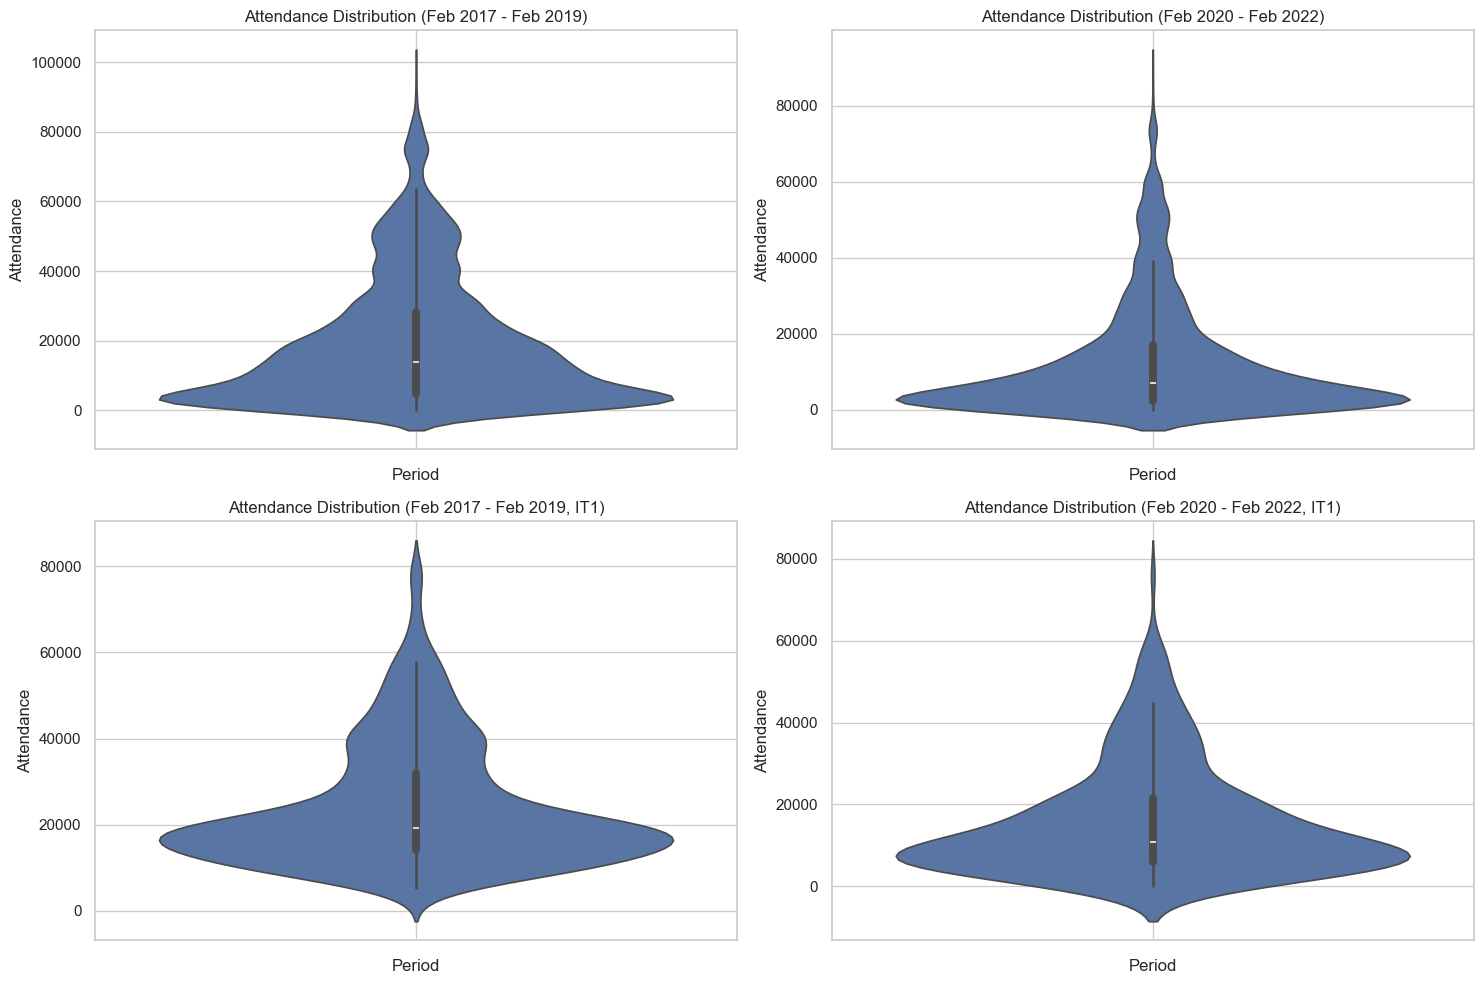

In [115]:

filtered_games_df = games_df[['game_id', 'attendance','date', 'competition_id']]

period1_start = '2017-02-01'
period1_end = '2019-02-28'
period2_start = '2020-02-01'
period2_end = '2022-02-28'

filtered_df_period1 = filtered_games_df[(filtered_games_df['date'] >= period1_start) & (filtered_games_df['date'] <= period1_end)]
filtered_df_period2 = filtered_games_df[(filtered_games_df['date'] >= period2_start) & (filtered_games_df['date'] <= period2_end)]

filtered_df_period1_it1 = filtered_df_period1[filtered_df_period1['competition_id'] == 'IT1']
filtered_df_period2_it1 = filtered_df_period2[filtered_df_period2['competition_id'] == 'IT1']

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(y='attendance', data=filtered_df_period1)
plt.title('Attendance Distribution (Feb 2017 - Feb 2019)')
plt.xlabel('Period')
plt.ylabel('Attendance')
plt.grid(True)
plt.subplot(2, 2, 2)
sns.violinplot(y='attendance', data=filtered_df_period2)
plt.title('Attendance Distribution (Feb 2020 - Feb 2022)')
plt.xlabel('Period')
plt.ylabel('Attendance')
plt.grid(True)
plt.subplot(2, 2, 3)
sns.violinplot(y='attendance', data=filtered_df_period1_it1)
plt.title('Attendance Distribution (Feb 2017 - Feb 2019, IT1)')
plt.xlabel('Period')
plt.ylabel('Attendance')
plt.grid(True)
plt.subplot(2, 2, 4)
sns.violinplot(y='attendance', data=filtered_df_period2_it1)
plt.title('Attendance Distribution (Feb 2020 - Feb 2022, IT1)')
plt.xlabel('Period')
plt.ylabel('Attendance')
plt.grid(True)
plt.tight_layout()
plt.show()

In [116]:
filtered_competition_df = competition_df[['competition_id', 'competition_code']]
#mi serve per fare un join con la tabella games in modo da conoscere il nome della competizione e mostrarlo nel grafico
filtered_competition_df

,competition_id,competition_code
0,CIT,italy-cup
1,NLSC,johan-cruijff-schaal
2,GRP,kypello-elladas
3,POSU,supertaca-candido-de-oliveira
4,RUSS,russian-super-cup
5,SUC,supercopa
6,USC,uefa-super-cup
7,DK1,superligaen
8,EL,europa-league
9,ES1,laliga


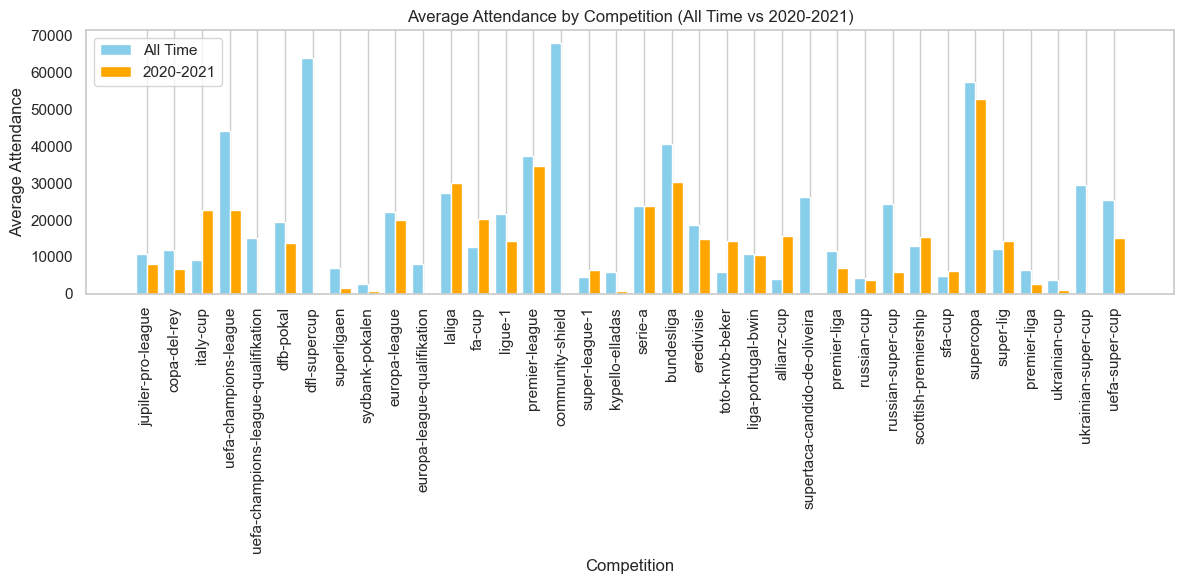

In [117]:
# Filtra i dati per l'anno solare 2020-2021
start_date = '2020-01-01'
end_date = '2021-01-01'
filtered_df_2020 = filtered_games_df[(filtered_games_df['date'] >= start_date) & (filtered_games_df['date'] <= end_date)]
average_attendance_by_competition_2020 = filtered_df_2020.groupby('competition_id')['attendance'].mean().reset_index()
average_attendance_by_competition = filtered_games_df.groupby('competition_id')['attendance'].mean().reset_index()
merged_df = pd.merge(average_attendance_by_competition, average_attendance_by_competition_2020, on='competition_id', suffixes=('_all_time', '_2020'))

merged_df = pd.merge(merged_df, filtered_competition_df, on='competition_id')

plt.figure(figsize=(12, 6))

bar_width = 0.4
index = np.arange(len(merged_df))

plt.bar(index, merged_df['attendance_all_time'], bar_width, label='All Time', color='skyblue')

plt.bar(index + bar_width, merged_df['attendance_2020'], bar_width, label='2020-2021', color='orange')

plt.xlabel('Competition')
plt.ylabel('Average Attendance')
plt.title('Average Attendance by Competition (All Time vs 2020-2021)')
plt.xticks(index + bar_width / 2, merged_df['competition_code'], rotation=90)
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\umber\AppData\Local\Temp\ipykernel_2548\4047775158.py:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


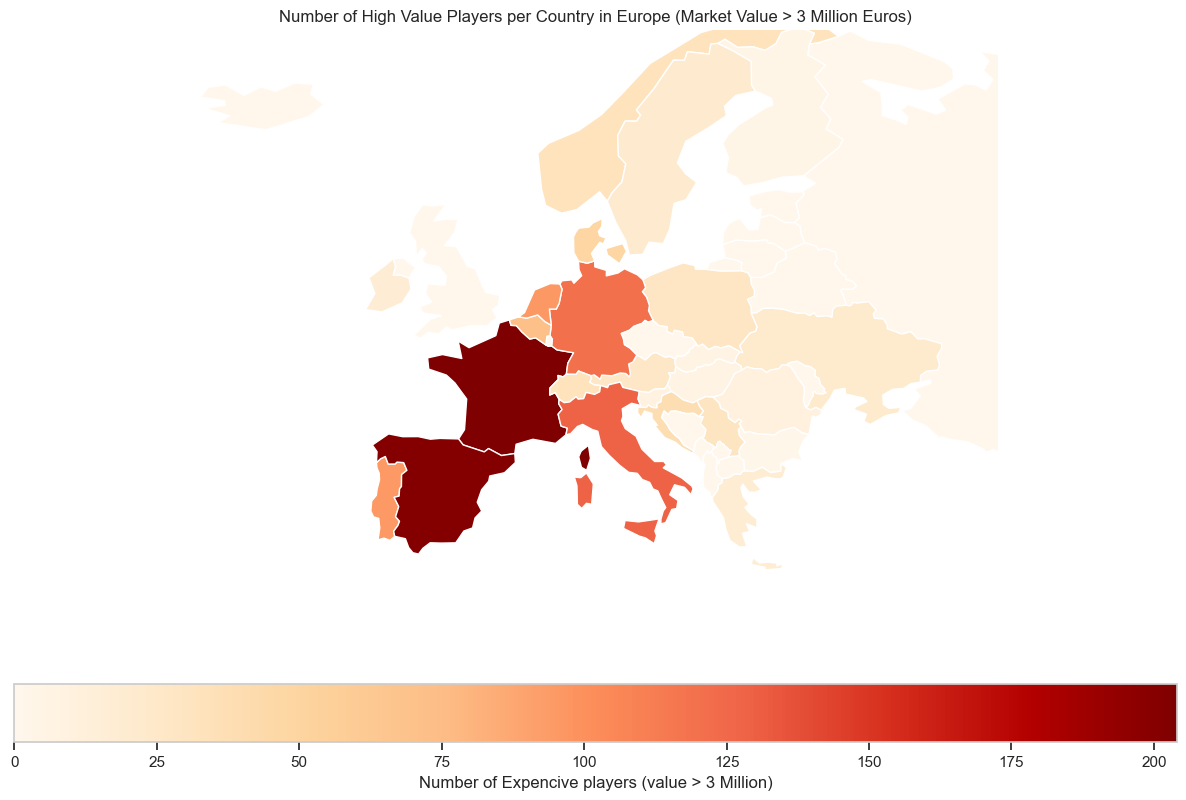

In [129]:
filtered_player = filtered_player[['player_id', 'market_value_in_eur', 'current_club_domestic_competition_id', 'country_of_citizenship']]

# Filtra i giocatori con valore di mercato maggiore di 3 milioni di euro
filtered_player = filtered_player[filtered_player['market_value_in_eur'] > 3000000]

main_european_countries = [
    'Germany', 'France', 'England', 'Italy', 'Spain', 'Netherlands', 'Belgium', 
    'Portugal', 'Sweden', 'Denmark', 'Switzerland', 'Austria', 'Ireland', 
    'Norway', 'Poland', 'Scotland', 'Finland', 'Greece', 'Czech Republic', 
    'Hungary', 'Ukraine', 'Croatia', 'Serbia', 'Romania', 'Slovakia', 
    'Bulgaria', 'Slovenia', 'Lithuania', 'Latvia', 'Estonia'
]
filtered_player = filtered_player[filtered_player['country_of_citizenship'].isin(main_european_countries)]
country_counts = filtered_player['country_of_citizenship'].value_counts().reset_index()
country_counts.columns = ['country', 'high_value_player_count']
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[(world['continent'] == 'Europe')]
europe = europe.rename(columns={'name': 'country'})
europe = europe.merge(country_counts, on='country', how='left')
europe['high_value_player_count'] = europe['high_value_player_count'].fillna(0)
xlim = (-25, 45)
ylim = (35, 70)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
europe.plot(column='high_value_player_count', ax=ax, legend=True,
            legend_kwds={'label': "Number of Expencive players (value > 3 Million)",
                         'orientation': "horizontal"},
            cmap='OrRd')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Number of High Value Players per Country in Europe (Market Value > 3 Million Euros)')
ax.set_axis_off()

plt.show()

In [130]:
high_card_players = cartellini_e_valore[cartellini_e_valore['cards_count_x'] > 10]
high_card_players

,player_id,cards_count_x,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id,club_id,game_id,position
0,25557,41,2023,2005-03-17 00:00:00,2005-03-17,2005-03-14,7000000,1,368,ES1,368,4112970,Defender
12,65467,34,2023,2008-01-11 00:00:00,2008-01-11,2008-01-07,100000,1,683,GR1,683,4146798,Midfield
23,53077,34,2023,2007-12-11 00:00:00,2007-12-11,2007-12-10,100000,1,30120,GR1,30120,4150482,Defender
32,128488,33,2018,2012-03-19 00:00:00,2012-03-19,2012-03-19,200000,1,367,ES1,2867,4204033,Defender
33,113045,32,2023,2010-08-15 00:00:00,2010-08-15,2010-08-09,1200000,1,265,GR1,265,4089915,Midfield
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,21333,11,2022,2004-10-04 00:00:00,2004-10-04,2004-10-04,300000,1,903,SC1,1192,4220530,NaN
3372,231172,11,2021,2012-07-03 00:00:00,2012-07-03,2012-07-02,100000,1,653,GR1,2669,4175312,Defender
3374,61253,11,2023,2007-11-20 00:00:00,2007-11-20,2007-11-19,100000,1,16795,ES1,16795,4112807,Defender
3389,127048,11,2023,2010-07-16 00:00:00,2010-07-16,2010-07-12,150000,1,141,TR1,141,4126774,Attack


In [131]:
high_card_players = pd.merge(high_card_players, filtered_player[['player_id', 'country_of_citizenship']], on='player_id')
high_card_players

,player_id,cards_count_x,last_season,datetime,date,dateweek,market_value_in_eur,n,current_club_id,player_club_domestic_competition_id,club_id,game_id,position,country_of_citizenship
0,25557,41,2023,2005-03-17 00:00:00,2005-03-17,2005-03-14,7000000,1,368,ES1,368,4112970,Defender,Spain
1,74683,31,2023,2008-10-21 00:00:00,2008-10-21,2008-10-20,350000,1,273,FR1,273,4094593,Midfield,Serbia
2,65230,29,2022,2008-08-15 00:00:00,2008-08-15,2008-08-11,300000,1,131,ES1,131,3998377,Midfield,Spain
3,59561,27,2023,2007-11-20 00:00:00,2007-11-20,2007-11-19,100000,1,1050,ES1,1050,4112812,Midfield,Spain
4,158863,26,2023,2011-08-29 00:00:00,2011-08-29,2011-08-29,300000,1,131,ES1,131,4112970,Defender,Spain
5,119296,24,2023,2011-07-02 00:00:00,2011-07-02,2011-06-27,150000,1,16,L1,16,4088602,Midfield,Germany
6,105521,23,2023,2009-11-17 00:00:00,2009-11-17,2009-11-16,150000,1,398,IT1,398,4103477,Attack,Italy
7,32467,22,2023,2005-08-21 00:00:00,2005-08-21,2005-08-15,150000,1,368,ES1,368,4087203,Midfield,Croatia
8,133179,22,2023,2010-03-28 00:00:00,2010-03-28,2010-03-22,50000,1,800,IT1,800,4103479,Midfield,Netherlands
9,27992,21,2023,2005-09-15 00:00:00,2005-09-15,2005-09-12,150000,1,418,ES1,418,3998376,Midfield,Croatia


C:\Users\umber\AppData\Local\Temp\ipykernel_2548\3069839685.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


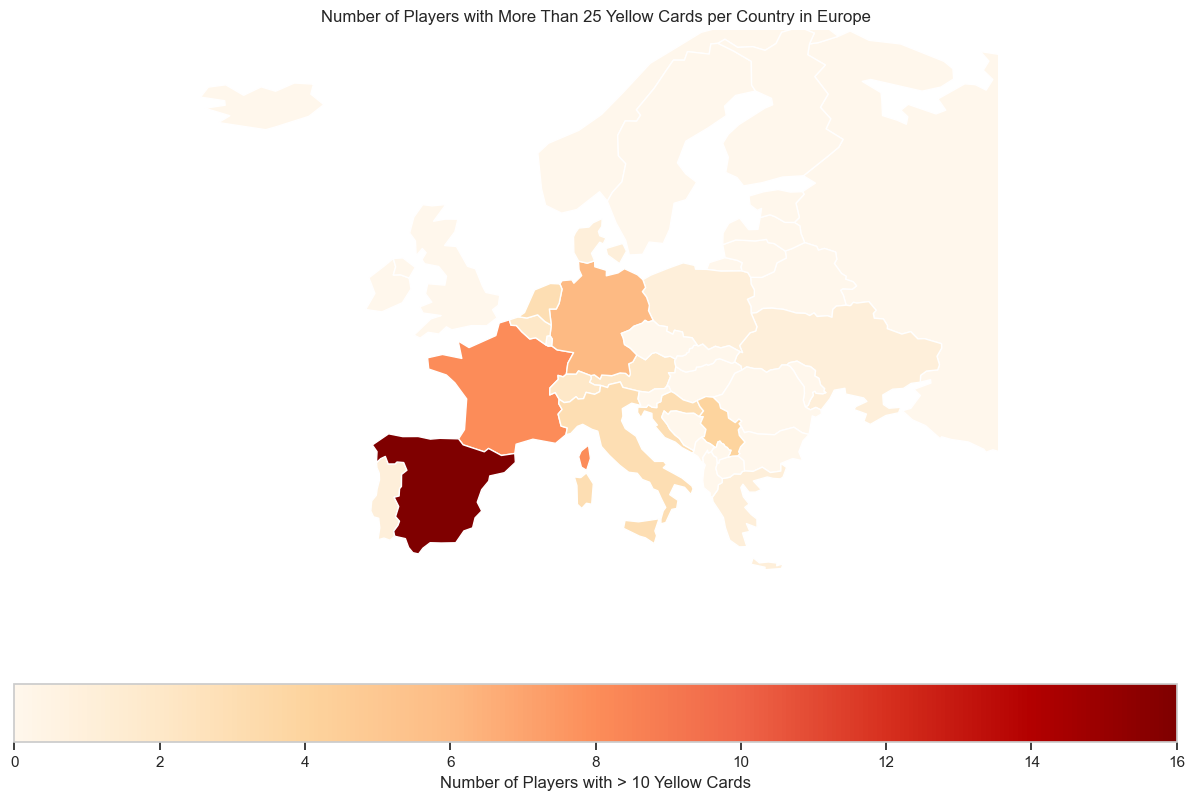

In [132]:
high_card_players = high_card_players[high_card_players['country_of_citizenship'].isin(main_european_countries)]
country_counts = high_card_players['country_of_citizenship'].value_counts().reset_index()
country_counts.columns = ['country', 'high_card_player_count']
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[(world['continent'] == 'Europe')]
europe = europe.rename(columns={'name': 'country'})
europe = europe.merge(country_counts, on='country', how='left')
europe['high_card_player_count'] = europe['high_card_player_count'].fillna(0)
xlim = (-25, 45)
ylim = (35, 70)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
europe.plot(column='high_card_player_count', ax=ax, legend=True,
            legend_kwds={'label': "Number of Players with > 10 Yellow Cards",
                         'orientation': "horizontal"},
            cmap='OrRd')
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Number of Players with More Than 25 Yellow Cards per Country in Europe')
ax.set_axis_off()
plt.show()

In [133]:
country_counts

,country,high_card_player_count
0,Spain,16
1,France,8
2,Germany,6
3,Serbia,4
4,Italy,3
5,Croatia,3
6,Netherlands,3
7,Switzerland,2
8,Austria,2
9,England,2


C:\Users\umber\AppData\Local\Temp\ipykernel_2548\4204826611.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


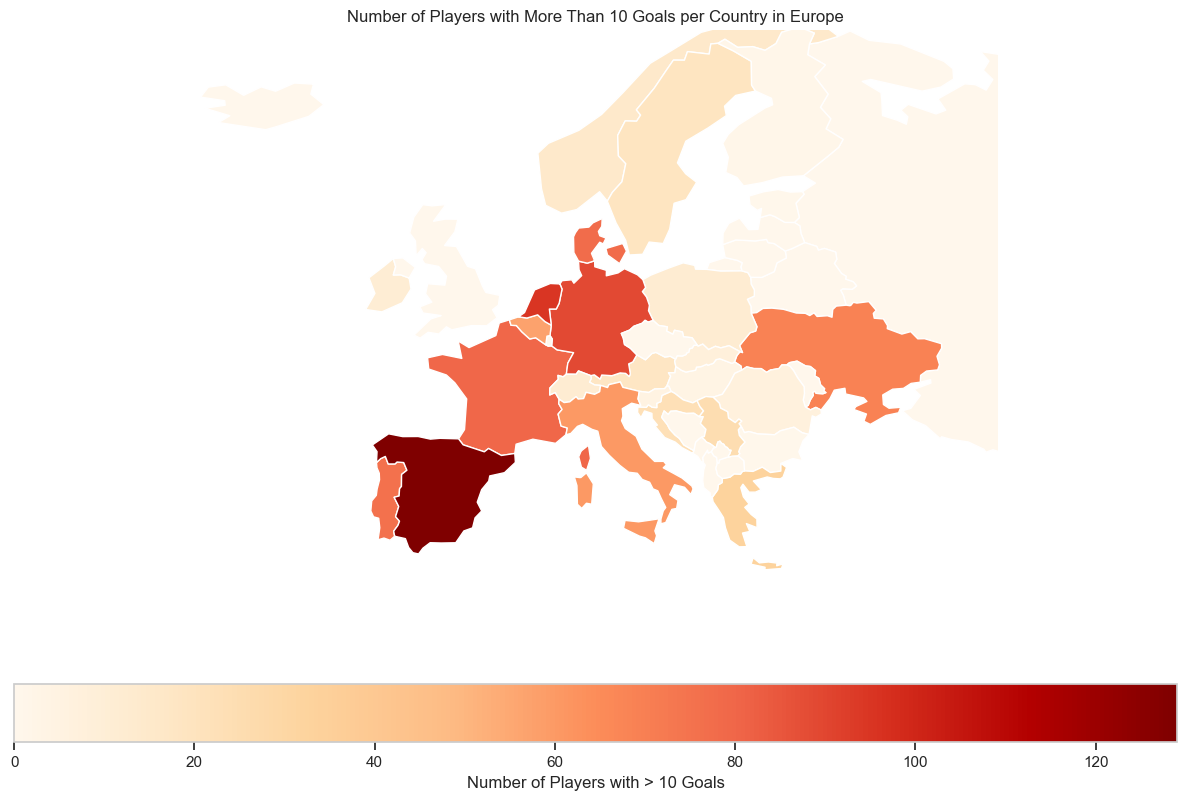

In [127]:
player_complete = pd.merge(cartellini_e_valore, players_df[['player_id', 'total_goals_in_career', 'country_of_citizenship']], on='player_id')

# Filtra i giocatori con più di 10 goal
high_goal_players = player_complete[player_complete['total_goals_in_career'] > 10]
high_goal_players = high_goal_players[high_goal_players['country_of_citizenship'].isin(main_european_countries)]
country_counts = high_goal_players['country_of_citizenship'].value_counts().reset_index()
country_counts.columns = ['country', 'high_goal_player_count']
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = world[(world['continent'] == 'Europe')]
europe = europe.rename(columns={'name': 'country'})
europe = europe.merge(country_counts, on='country', how='left')
europe['high_goal_player_count'] = europe['high_goal_player_count'].fillna(0)
xlim = (-25, 45)
ylim = (35, 70)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
europe.plot(column='high_goal_player_count', ax=ax, legend=True,
            legend_kwds={'label': "Number of Players with > 10 Goals",
                         'orientation': "horizontal"},
            cmap='OrRd')

ax.set_xlim(xlim)
ax.set_ylim(ylim)
ax.set_title('Number of Players with More Than 10 Goals per Country in Europe')
ax.set_axis_off()

plt.show()

In [92]:
country_counts

,country,high_goal_player_count
0,Spain,129
1,Netherlands,95
2,Germany,89
3,France,80
4,Denmark,78
5,Portugal,76
6,England,71
7,Ukraine,69
8,Italy,60
9,Belgium,57


# in tutti i grafici generati con geopandas la spagna è sempre molto rilevante, questo è dovuto sia alla nota qualità del campionato e dei giocatori spagnoli, ma è anche dovuto alla grande mole di dati di giocatori di origine spagnola che sono presenti nel databse 

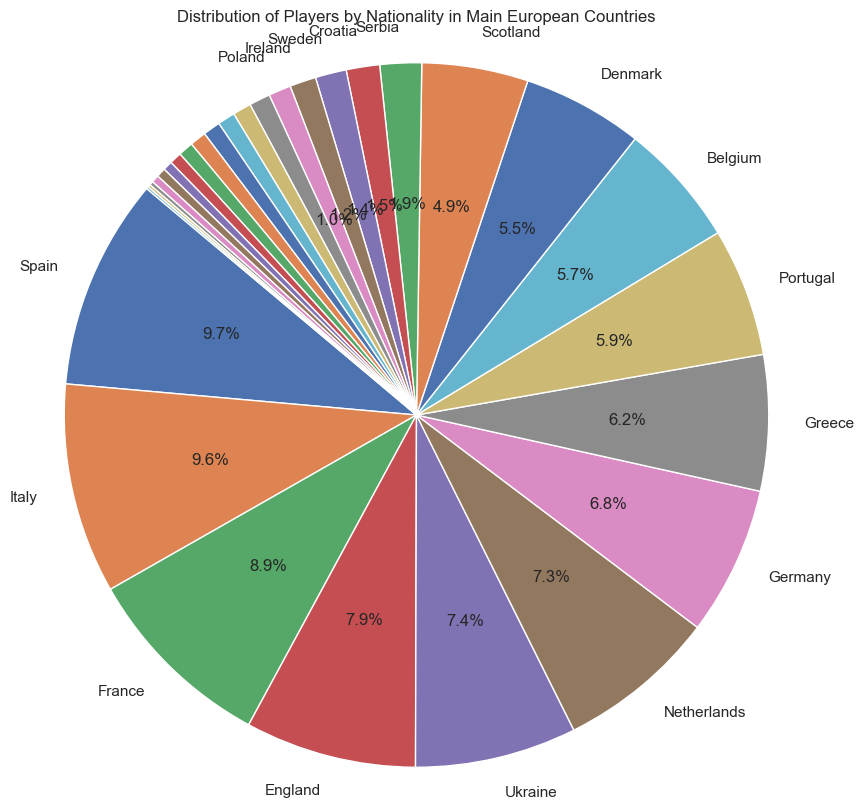

In [137]:
filtered_players = players_df[players_df['country_of_citizenship'].isin(main_european_countries)]

country_counts = filtered_players['country_of_citizenship'].value_counts()

# Calcola la percentuale per ciascun paese
total_count = country_counts.sum()
country_percentages = (country_counts / total_count) * 100

# Funzione per mostrare il nome del paese solo se la percentuale è sopra l'1%
def label_format(country, pct):
    return country if pct > 1 else ''

# Funzione per mostrare la percentuale solo se sopra l'1%
def autopct_format(pct):
    return ('%1.1f%%' % pct) if pct > 1 else ''

# Creare un grafico a torta
plt.figure(figsize=(10, 10))
plt.pie(country_counts, labels=[label_format(country, pct) for country, pct in zip(country_counts.index, country_percentages)],
        autopct=autopct_format, startangle=140)
plt.title('Distribution of Players by Nationality in Main European Countries')
plt.axis('equal')
plt.show()

### la parte finale di geopandas è stata sviluppata in questo file per comodità dei dataframe, ma è stato un lavoro collaborativo di tutti i membri del gruppo